In [26]:
import cairo
import math
from io import BytesIO
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np 

ImportError: Something is wrong with the numpy installation. While importing we detected an older version of numpy in ['/home/robbizorg/anaconda3/envs/ai/lib/python3.6/site-packages/numpy']. One method of fixing this is to repeatedly uninstall numpy until none is found, then reinstall this version.

In [199]:
## Example Straight Road Need to convert to others

import IPython.display

svgio = BytesIO()
with cairo.SVGSurface(svgio, 400, 200) as surface:
    # These lines are copied verbatim from the
    # pycairo page: https://pycairo.readthedocs.io
    context = cairo.Context(surface)
    context.scale(400, 200)
    
#     context.set_source_rgba(1, 0.2, 0.2, 0.6)
#     context.set_line_width(0.02)
#     context.move_to(x, y)
#     context.line_to(x1, y1)
#     context.move_to(x2, y2)
#     context.line_to(x3, y3)
#     context.stroke()
    context.set_source_rgb(0.6, 0.6, 0.6)
    context.rectangle(0, 0, 1, 1)  
    context.fill()
    # end of pycairo copy
    
    context.set_source_rgb(0, 0, 0)
    x, y, x1, y1 = 0, 0.5, 1, 0.5 # Cairo does x,y from top left
    x2, y2, x3, y3 = 0.6, 0.1, 0.9, 0.5
    
    context.set_line_width(0.1)
    context.move_to(x, y)
    context.line_to(x1, y1) 
    context.stroke() 
    
    context.move_to(0.0, 0.3)
    context.line_to(1, 0.3)

    context.stroke()
    
with cairo.SVGSurface(svgio, 400, 200) as surface:
    # These lines are copied verbatim from the
    # pycairo page: https://pycairo.readthedocs.io
    context = cairo.Context(surface)
    context.scale(400, 200)
    
    context.move_to(0.0, 0.7)
    context.line_to(1, 0.3)

    context.stroke()
    
IPython.display.SVG(data=svgio.getvalue())

ExpatError: junk after document element: line 9, column 0

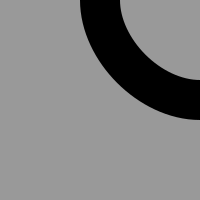

In [220]:
## Example Curved Road
svgio = BytesIO()
with cairo.SVGSurface(svgio, 200, 200) as surface:
    context = cairo.Context(surface)
    context.scale(200, 200)
    
    context.set_source_rgb(0.6, 0.6, 0.6)
    context.rectangle(0, 0, 1, 1)  
    context.fill()
   
    
    context.set_source_rgb(0, 0, 0)
    x, y, x1, y1 = 0.5, 0, 0.5, 0.25 # Cairo does x,y from top left
    x2, y2, x3, y3 = 0.75, 0.5, 1, 0.5
    
    context.set_line_width(0.2)
    context.move_to(x, y)
    context.curve_to(x1, y1,x2,y2,x3,y3) 

    context.stroke()
    
IPython.display.SVG(data=svgio.getvalue())

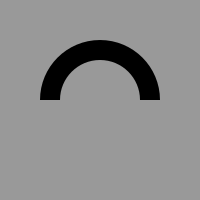

In [223]:
svgio = BytesIO()
surface = cairo.SVGSurface(svgio, 200, 200) 
    
context = cairo.Context(surface)
context.scale(200, 200)

context.set_source_rgb(0.6, 0.6, 0.6)
context.rectangle(0, 0, 1, 1)  
context.fill()


context.set_source_rgb(0, 0, 0)
x, y = 1, 0.5

context.set_line_width(0.1)
context.arc(0.5, 0.5, 0.25, math.pi, 2*math.pi)
context.stroke()
surface.finish() ## Call this to do what we need
IPython.display.SVG(data=svgio.getvalue())

In [338]:
# Code to Build the map
def wrapper(arr):
    svgio = BytesIO()
    surface = cairo.SVGSurface(svgio, 200*len(arr[0]), 200*len(arr))
    context = cairo.Context(surface)
    context.scale(200*len(arr[0]), 200*len(arr))
    
    # Build the Map
    build_map(arr, context)

    theta = 0
    unit = 1/len(arr)
#     ctx2 = cairo.Context(surface)
#     ctx2.scale(200)
    put_car(0.5,0.5,theta,1/len(arr),context)
    
    surface.write_to_png('track.png')
    surface.finish()
    
    return IPython.display.SVG(data=svgio.getvalue())

def build_map(arr, context):
    for i in range(0, len(arr)):
        for j in range(0, len(arr[0])):
            cell = arr[i][j]
            context.set_line_width(0.1*(1/len(arr)))
            lx = j/len(arr[0])
            ly = i/len(arr)
            if cell == "s":
                
                context.move_to(lx,  ly + 0.5/len(arr))
                context.line_to(lx + 1/len(arr[0]), ly + 0.5/len(arr))

                context.stroke()

            if cell == "sd":
                print(lx + 0.5/len(arr[0]),  ly)
                print(lx + 0.5/len(arr[0]), ly + 1/len(arr))
                context.move_to(lx + 0.5/len(arr[0]),  ly)
                context.line_to(lx + 0.5/len(arr[0]), ly + 1/len(arr))

                context.stroke()

            if cell == "cdr":
                context.arc(lx + 1/len(arr[0]), 
                           ly + 1/len(arr), 0.5/len(arr),
                           math.pi, 3*math.pi/2)

                context.stroke()

            if cell == "cur":
                context.arc(lx + 1/len(arr[0]), 
                           ly, 0.5/len(arr),
                           math.pi/2, math.pi)

                context.stroke()

            if cell == "cul":
                context.arc(lx, 
                           ly, 0.5/len(arr),
                           0, math.pi/2)

                context.stroke()

            if cell == "cdl":
                context.arc(lx, 
                           ly + 1/len(arr), 0.5/len(arr),
                           3*math.pi/2, 0)

                context.stroke()    
    return 


# Puts the car down on the map
# NEED TO FIGURE OUT HOW TO SCALE THIS RECTANGLE
def put_car(x,y,theta,unit,context):
#     context.rotate(0.5)
   
    
    
    pat = cairo.LinearGradient(0.0, 0.0, 0.0, 1.0)
    pat.add_color_stop_rgba(1, 0.7, 0, 0, 0.95)  # First stop, 50% opacity
    pat.add_color_stop_rgba(0, 0.9, 0.7, 0.2, 1)  # Last stop, 100% opacity
    context.set_source(pat)
    
    theta=math.pi/4
#     mtx = cairo.Matrix(math.cos(theta), -math.sin(theta),
#                 math.sin(theta), math.cos(theta))

#     context.transform(mtx)
    context.rotate(theta)
    context.rectangle(0.25,-0.1,unit/5,unit/9) # Totate moves the entire context, just want to change the object
    
    
    context.fill()
    
    return
    
            

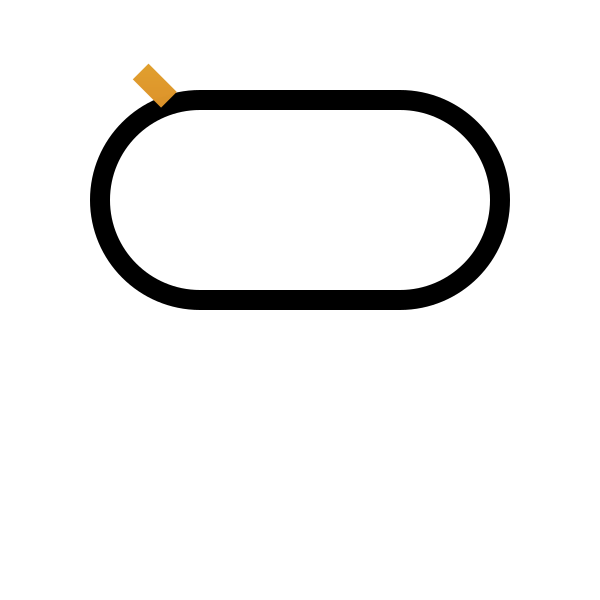

In [339]:
# This is a test track
arr = [["cdr","s","cdl"],
       ["cur", "s", "cul"],
      ["", "", ""]]
# arr = [["cdr","cdl"],
#        ["sd","sd"],
#        ["cur", "cul"]]
wrapper(arr)

In [ ]:
## Let's Make a Car
